# Reading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mayoralElections.csv")
pd.set_option('display.max_columns', None)
df.head(5)

,contest,fips,geo_name,year,month,votes,candidate_count,incumbent,winner,vote_share,n_winners,prob_democrat,prob_republican,pid_est,prob_male,prob_female,gender_est,prob_black,prob_white,prob_hispanic,prob_asian,prob_other,race_est,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american
0,3651000_1993_11_new york_NY_Mayor_mayor_1,3651000,new york,1993,11.0,876896.0,5,1.0,lose,0.48,1,1.00,0.00,D,1.0,0.0,M,1.0,0.0,0.0,0.0,0.0,black,0.529239,0.499826,0.280773,0.251432,0.200464
1,3651000_1997_11_new york_NY_Mayor_mayor_1,3651000,new york,1997,11.0,783815.0,6,1.0,win,0.58,1,0.00,1.00,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.527511,0.469403,0.272300,0.261922,0.219124
2,3651000_2017_11_new york_NY_Mayor_mayor_1,3651000,new york,2017,11.0,760112.0,7,1.0,win,0.66,1,1.00,0.00,D,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.523626,0.431091,0.246823,0.289247,0.175935
3,3651000_2005_11_new york_NY_Mayor_mayor_1,3651000,new york,2005,11.0,753089.0,8,1.0,win,0.58,1,0.00,1.00,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.525647,0.443310,0.260708,0.277772,0.245357
4,3651000_2009_11_new york_NY_Mayor_mayor_1,3651000,new york,2009,11.0,585470.0,12,1.0,win,0.51,1,0.06,0.94,R,1.0,0.0,M,0.0,1.0,0.0,0.0,0.0,caucasian,0.525192,0.440690,0.256518,0.284158,0.255147


# Cleaning Data

In [3]:
df = df[["geo_name", "year", "month", "candidate_count", "winner", "pid_est",
         "gender_est", "race_est", "percent_women", "percent_white", "percent_black",
         "percent_hispanic", "percent_asian_american"]]

In [4]:
df.count()

geo_name                  2398
year                      2398
month                     2235
candidate_count           2398
winner                    2398
pid_est                   2313
gender_est                2306
race_est                  2394
percent_women             2305
percent_white             2305
percent_black             2305
percent_hispanic          2305
percent_asian_american    2305
dtype: int64

### Removing N/A Values

In [5]:
df.isna().sum()

geo_name                    0
year                        0
month                     163
candidate_count             0
winner                      0
pid_est                    85
gender_est                 92
race_est                    4
percent_women              93
percent_white              93
percent_black              93
percent_hispanic           93
percent_asian_american     93
dtype: int64

In [6]:
df["pid_est"].fillna("unknown", inplace=True)
df["gender_est"].fillna("unknown", inplace=True)
df["race_est"].fillna("unknown", inplace=True)

C:\Users\SiCor\AppData\Local\Temp\ipykernel_13128\3894327018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["pid_est"].fillna("unknown", inplace=True)
C:\Users\SiCor\AppData\Local\Temp\ipykernel_13128\3894327018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [7]:
df.dropna(inplace=True)

In [8]:
df.count()

geo_name                  2142
year                      2142
month                     2142
candidate_count           2142
winner                    2142
pid_est                   2142
gender_est                2142
race_est                  2142
percent_women             2142
percent_white             2142
percent_black             2142
percent_hispanic          2142
percent_asian_american    2142
dtype: int64

In [9]:
df.isna().sum()

geo_name                  0
year                      0
month                     0
candidate_count           0
winner                    0
pid_est                   0
gender_est                0
race_est                  0
percent_women             0
percent_white             0
percent_black             0
percent_hispanic          0
percent_asian_american    0
dtype: int64

### Removing Duplicate Rows

In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(inplace=True)

### Handling Spare Columns

In [12]:
df.nunique(axis=0)

geo_name                   490
year                        28
month                       12
candidate_count             17
winner                       2
pid_est                      3
gender_est                   3
race_est                     6
percent_women             2095
percent_white             2095
percent_black             2095
percent_hispanic          2095
percent_asian_american    2095
dtype: int64

### Formatting Variables

In [13]:
df.dtypes

geo_name                   object
year                        int64
month                     float64
candidate_count             int64
winner                     object
pid_est                    object
gender_est                 object
race_est                   object
percent_women             float64
percent_white             float64
percent_black             float64
percent_hispanic          float64
percent_asian_american    float64
dtype: object

In [14]:
df["pid_est"].replace({"D": "Democrat", "R": "Republican"}, inplace=True)
df["gender_est"].replace({"M": "Male", "F": "Female"}, inplace=True)
df["month"].replace({1: "January", 2: "February", 3: "March", 4: "April",
                          5: "May", 6: "June", 7: "July", 8: "August", 9: "September",
                          10: "October", 11: "November", 12: "December"}, inplace=True)

C:\Users\SiCor\AppData\Local\Temp\ipykernel_13128\1880276544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["pid_est"].replace({"D": "Democrat", "R": "Republican"}, inplace=True)
C:\Users\SiCor\AppData\Local\Temp\ipykernel_13128\1880276544.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [15]:
df["geo_name"] = df["geo_name"].apply(lambda x: x.title())
df["pid_est"] = df["pid_est"].apply(lambda x: x.capitalize())
df["gender_est"] = df["gender_est"].apply(lambda x: x.capitalize())
df["race_est"] = df["race_est"].apply(lambda x: x.capitalize())

In [18]:
df["winner"].replace({"win": 1, "lose": 0}, inplace=True)
df["challenger_win"] = df["winner"].map({1: 0, 0: 1})

In [19]:
df.dtypes

geo_name                   object
year                        int64
month                      object
candidate_count             int64
winner                      int64
pid_est                    object
gender_est                 object
race_est                   object
percent_women             float64
percent_white             float64
percent_black             float64
percent_hispanic          float64
percent_asian_american    float64
challenger_win              int64
dtype: object

In [20]:
df.head(5)

,geo_name,year,month,candidate_count,winner,pid_est,gender_est,race_est,percent_women,percent_white,percent_black,percent_hispanic,percent_asian_american,challenger_win
0,New York,1993,November,5,0,Democrat,Male,Black,0.529239,0.499826,0.280773,0.251432,0.200464,1
1,New York,1997,November,6,1,Republican,Male,Caucasian,0.527511,0.469403,0.272300,0.261922,0.219124,0
2,New York,2017,November,7,1,Democrat,Male,Caucasian,0.523626,0.431091,0.246823,0.289247,0.175935,0
3,New York,2005,November,8,1,Republican,Male,Caucasian,0.525647,0.443310,0.260708,0.277772,0.245357,0
4,New York,2009,November,12,1,Republican,Male,Caucasian,0.525192,0.440690,0.256518,0.284158,0.255147,0


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Election Year
df["year"].describe()

count    9215.000000
mean     2008.193055
std         8.209724
min      1993.000000
25%      2001.000000
50%      2009.000000
75%      2015.000000
max      2021.000000
Name: year, dtype: float64

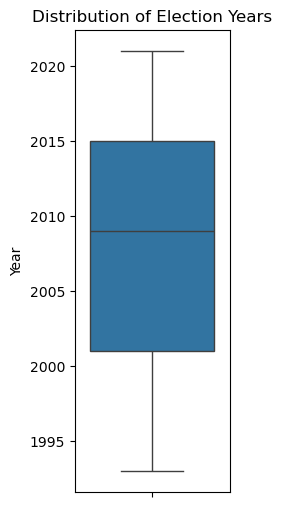

In [24]:
plt.figure(figsize=(2, 6))
sns.boxplot(
    data=df,
    y=df["year"])
plt.title("Distribution of Election Years")
plt.ylabel("Year")
plt.show()

In [26]:
# Winning candidates by race
df_winner_by_race = df.groupby("race_est")[["winner", "loser"]].sum()
df_winner_by_race

,winner,loser
race_est,,
Asian,70,103
Black,384,798
Caucasian,2972,3976
Hispanic,207,540
Other,7,1
Unknown,10,147


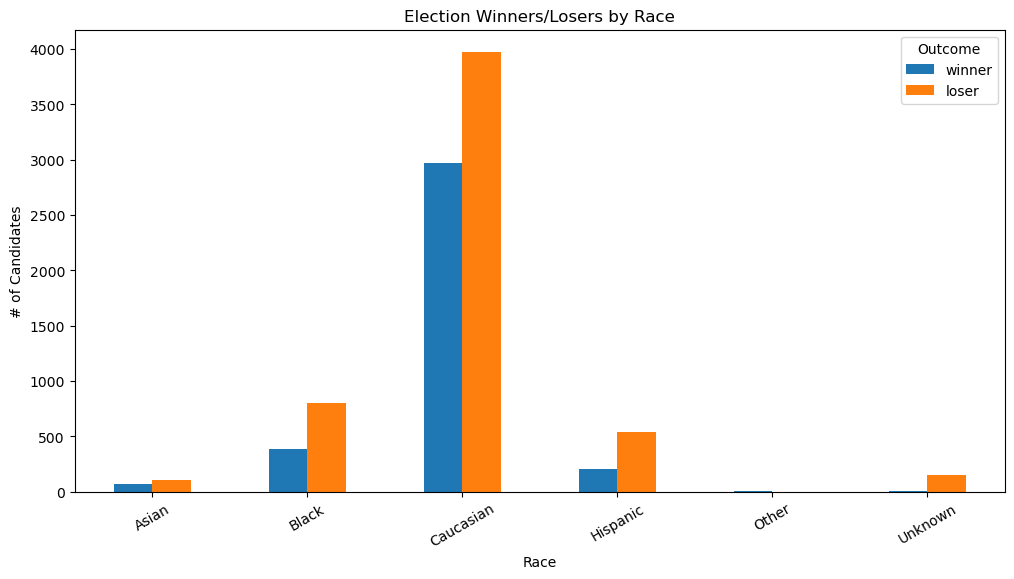

In [30]:
ax = df_winner_by_race.plot(kind='bar', figsize=(12, 6))
plt.title("Election Winners/Losers by Race")
plt.xlabel("Race")
plt.xticks(rotation=30)
plt.ylabel("# of Candidates")
plt.legend(title="Outcome")
plt.show()

In [31]:
df_incumbents_winner_by_race = df.groupby("race_est")[["incumbent_win", "incumbent_lose"]].sum()

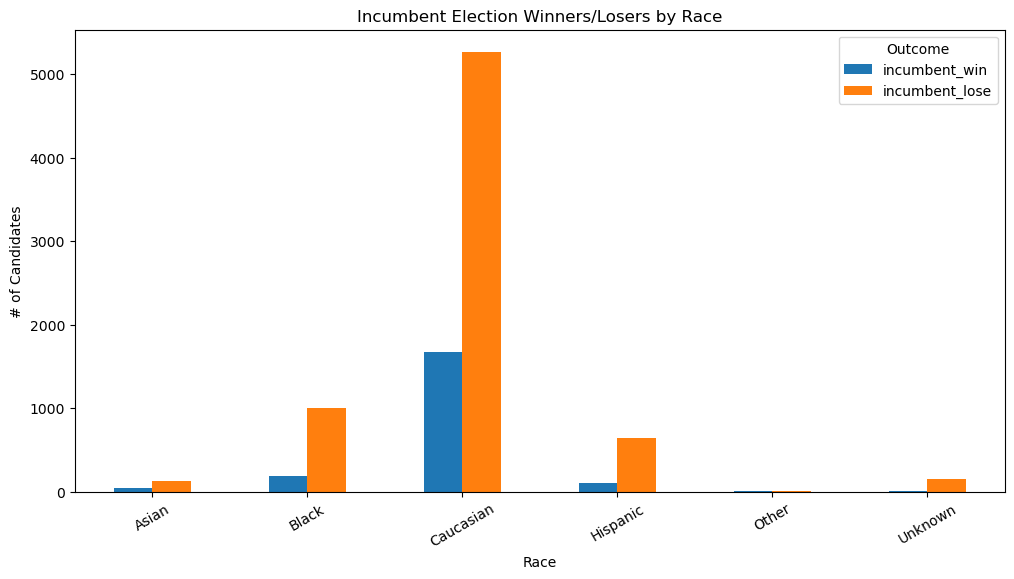

In [32]:
ax = df_incumbents_winner_by_race.plot(kind='bar', figsize=(12, 6))
plt.title("Incumbent Election Winners/Losers by Race")
plt.xlabel("Race")
plt.xticks(rotation=30)
plt.ylabel("# of Candidates")
plt.legend(title="Outcome")
plt.show()

In [33]:
# Winning candidates by party
df_winner_by_party = df.groupby("pid_est")[["winner", "loser"]].sum()

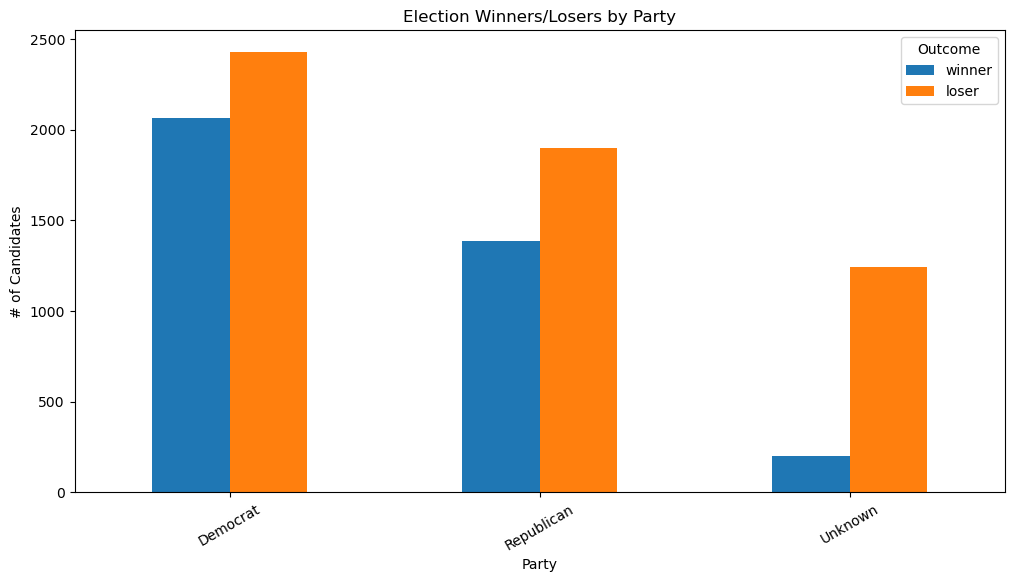

In [34]:
ax = df_winner_by_party.plot(kind='bar', figsize=(12, 6))
plt.title("Election Winners/Losers by Party")
plt.xlabel("Party")
plt.xticks(rotation=30)
plt.ylabel("# of Candidates")
plt.legend(title="Outcome")
plt.show()

In [35]:
df_incumbents_winner_by_party = df.groupby("pid_est")[["incumbent_win", "incumbent_lose"]].sum()

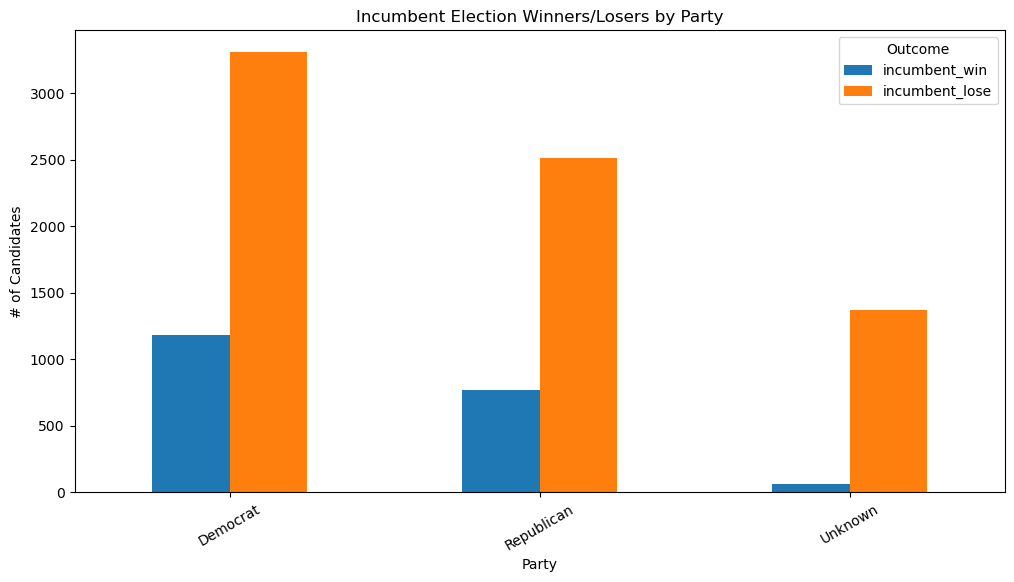

In [36]:
ax = df_incumbents_winner_by_party.plot(kind='bar', figsize=(12, 6))
plt.title("Incumbent Election Winners/Losers by Party")
plt.xlabel("Party")
plt.xticks(rotation=30)
plt.ylabel("# of Candidates")
plt.legend(title="Outcome")
plt.show()

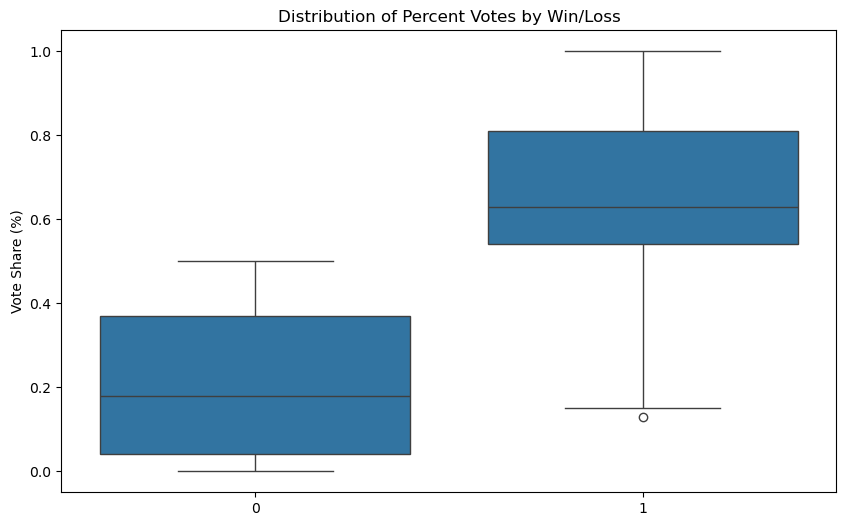

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="winner",
    y="vote_share")
plt.title("Distribution of Percent Votes by Win/Loss")
plt.xlabel("")
plt.ylabel("Vote Share (%)")
plt.show()

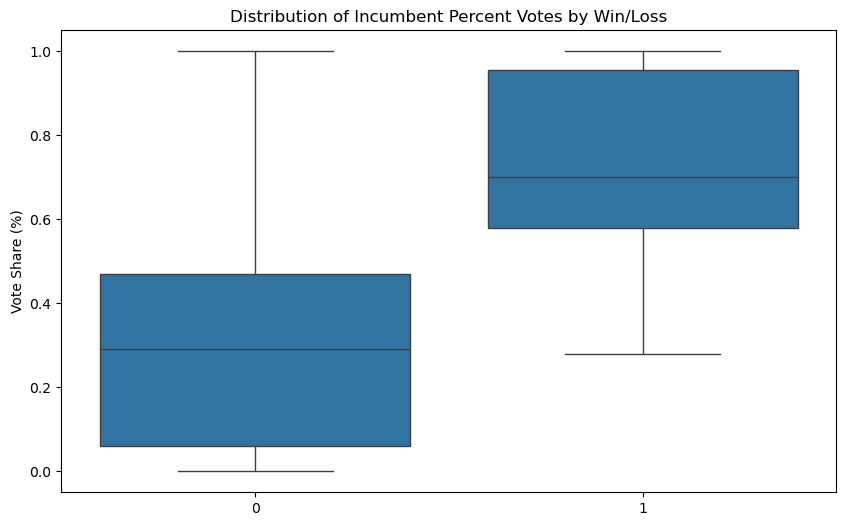

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="incumbent_win",
    y="vote_share")
plt.title("Distribution of Incumbent Percent Votes by Win/Loss")
plt.xlabel("")
plt.ylabel("Vote Share (%)")
plt.show()

In [21]:
df.to_csv("Mayoral Elections Cleaned.csv")